# Exploratory Data Analysis 

### Cargando librerías y estableciendo rutas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from datetime import datetime

In [2]:
%matplotlib inline

In [3]:
PATH = '/Users/sergiosars/Documents/MCD/DPA/data/'

### Leyendo archivo

In [4]:
inspect_df = pd.read_csv(PATH+'Food_Inspections.csv')

In [5]:
inspect_df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2472391,PHILZ COFFEE,PHILZ COFFEE,2766979.0,NaN,Risk 2 (Medium),1555 N WELLS ST,CHICAGO,IL,60610.0,01/07/2021,License,Not Ready,NaN,41.910736,-87.634551,"(-87.63455069145124, 41.910736031820235)"
1,2453551,BIAN,BIAN,2744753.0,Restaurant,Risk 1 (High),600 W CHICAGO AVE,CHICAGO,IL,60654.0,10/20/2020,License,Pass,NaN,41.896585,-87.642996,"(-87.64299618172501, 41.896585191199556)"
2,2386633,JIN JU,JIN JU,27137.0,Restaurant,Risk 1 (High),5203 N CLARK ST,CHICAGO,IL,60640.0,08/28/2020,Canvass,No Entry,NaN,41.976301,-87.668276,"(-87.66827593789948, 41.97630115368914)"
3,2386595,LA BIZNAGA #2,LA BIZNAGA #2,2708992.0,NaN,Risk 1 (High),2949 W BELMONT AVE,CHICAGO,IL,60618.0,08/27/2020,Complaint,No Entry,NaN,41.939256,-87.702270,"(-87.70226967930802, 41.939255926667535)"
4,2386523,MC DONALD'S,MC DONALD'S,2560785.0,Restaurant,Risk 2 (Medium),6336 S ASHLAND AVE,CHICAGO,IL,60636.0,08/26/2020,Short Form Complaint,Pass,NaN,41.778361,-87.664337,"(-87.66433686342792, 41.77836097603761)"


### Datos básicos de la base

In [6]:
# dimensiones de la base
# número de registros
print("Número de observaciones:", inspect_df.shape[0])
# número de columnas
print("Número de columnas:", len(inspect_df.columns))

Número de observaciones: 215130
Número de columnas: 17


In [7]:
# Columnas de la base
inspect_df.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

### Renombramos columnas para que tengan nombres más manejables

In [8]:
# eliminar "#"
inspect_df.columns = inspect_df.columns.str.replace('#','')
# Elimina espacios alrededor
inspect_df.columns = inspect_df.columns.str.strip() 
# Cambia espacios por "_"
inspect_df.columns = inspect_df.columns.str.replace(' ','_')
# Cambiar a minúsculas
inspect_df.columns = inspect_df.columns.str.lower()

In [9]:
inspect_df.dtypes

inspection_id        int64
dba_name            object
aka_name            object
license            float64
facility_type       object
risk                object
address             object
city                object
state               object
zip                float64
inspection_date     object
inspection_type     object
results             object
violations          object
latitude           float64
longitude          float64
location            object
dtype: object

### Cambiamos la fecha de inspección a formato fecha

In [10]:
inspect_df['inspection_date']= pd.to_datetime(inspect_df['inspection_date'])

In [11]:
inspect_df.dtypes

inspection_id               int64
dba_name                   object
aka_name                   object
license                   float64
facility_type              object
risk                       object
address                    object
city                       object
state                      object
zip                       float64
inspection_date    datetime64[ns]
inspection_type            object
results                    object
violations                 object
latitude                  float64
longitude                 float64
location                   object
dtype: object

### Analizamos la frecuencia de la variable 'results'

In [12]:
inspect_df.results.unique()

array(['Not Ready', 'Pass', 'No Entry', 'Out of Business', 'Fail',
       'Pass w/ Conditions', 'Business Not Located'], dtype=object)

<AxesSubplot:title={'center':'Frecuencia resultados'}>

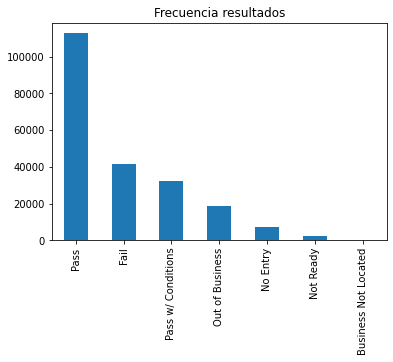

In [13]:
inspect_df['results'].value_counts().plot.bar(title='Frecuencia resultados')

### Creamos una variable indicadora para aquellos establecimientos que no pasan la inspección

In [14]:
# Variable Indicadora de "Fail" de la inspección
inspect_df['ind_fail'] = inspect_df['results'].apply(lambda x: 1 if x == 'Fail' else 0)
# Se crea la variale año de inspección
inspect_df['inspection_year'] = pd.DatetimeIndex(inspect_df['inspection_date']).year 
inspect_df.head()

,inspection_id,dba_name,aka_name,license,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location,ind_fail,inspection_year
0,2472391,PHILZ COFFEE,PHILZ COFFEE,2766979.0,NaN,Risk 2 (Medium),1555 N WELLS ST,CHICAGO,IL,60610.0,2021-01-07,License,Not Ready,NaN,41.910736,-87.634551,"(-87.63455069145124, 41.910736031820235)",0,2021
1,2453551,BIAN,BIAN,2744753.0,Restaurant,Risk 1 (High),600 W CHICAGO AVE,CHICAGO,IL,60654.0,2020-10-20,License,Pass,NaN,41.896585,-87.642996,"(-87.64299618172501, 41.896585191199556)",0,2020
2,2386633,JIN JU,JIN JU,27137.0,Restaurant,Risk 1 (High),5203 N CLARK ST,CHICAGO,IL,60640.0,2020-08-28,Canvass,No Entry,NaN,41.976301,-87.668276,"(-87.66827593789948, 41.97630115368914)",0,2020
3,2386595,LA BIZNAGA #2,LA BIZNAGA #2,2708992.0,NaN,Risk 1 (High),2949 W BELMONT AVE,CHICAGO,IL,60618.0,2020-08-27,Complaint,No Entry,NaN,41.939256,-87.702270,"(-87.70226967930802, 41.939255926667535)",0,2020
4,2386523,MC DONALD'S,MC DONALD'S,2560785.0,Restaurant,Risk 2 (Medium),6336 S ASHLAND AVE,CHICAGO,IL,60636.0,2020-08-26,Short Form Complaint,Pass,NaN,41.778361,-87.664337,"(-87.66433686342792, 41.77836097603761)",0,2020


### Frecuencia de inspecciones reportadas por año

<AxesSubplot:title={'center':'Frecuencia por año'}>

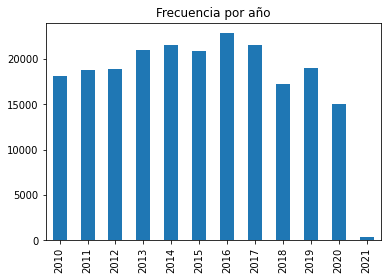

In [15]:
inspect_df['inspection_year'].value_counts().plot.bar(title='Frecuencia por año')

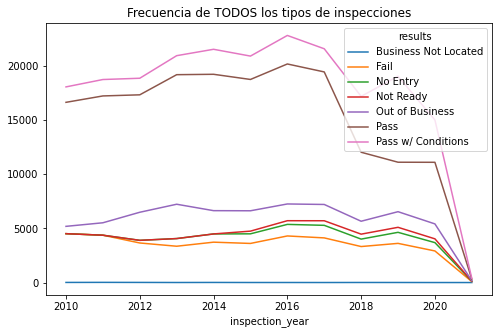

In [16]:
inspect_df.groupby(['inspection_year','results']).size().unstack().plot(
    kind='line',stacked=True, title='Frecuencia de TODOS los tipos de inspecciones', figsize=(8,5))
plt.show()

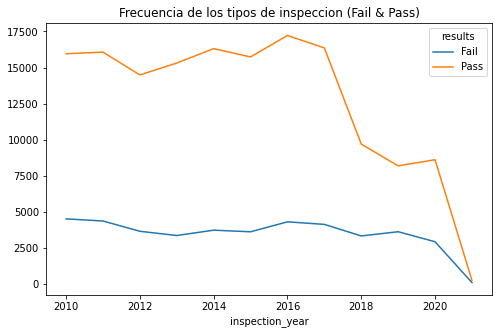

In [17]:
inspect_df[(inspect_df['results'] == 'Fail') | (inspect_df['results'] == 'Pass')].groupby(
    ['inspection_year','results']).size().unstack().plot(kind='line',stacked=True, 
                                                         title='Frecuencia de los tipos de inspeccion (Fail & Pass)', figsize=(8,5))
plt.show()

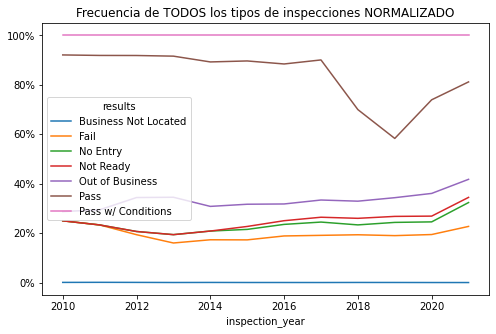

In [18]:
inspect_df.groupby(['inspection_year','results']).size().groupby(
    level=0).apply(lambda x: 100 * x / x.sum()
).unstack().plot(kind='line',stacked=True, title='Frecuencia de TODOS los tipos de inspecciones NORMALIZADO', figsize=(8,5))

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

### Para cada año obtenemos la tasa en la que reprueban las inspecciones

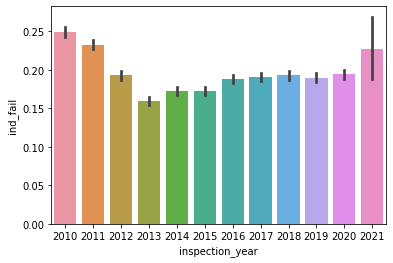

In [19]:
# Identificamos la tasa en la que reprueban los restaurantes por año
sns.barplot(x = "inspection_year", y = "ind_fail", data = inspect_df)
plt.show()

### Existe una variable 'Risk', esperariamos que tenga relación con los resultados de la inspección

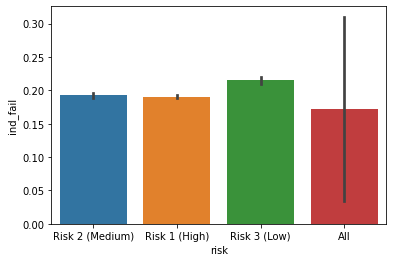

In [20]:
# Identificamos una tendencia contraintuitiva entre el nivel de riesgo y la tasa en la que reprueban los restaurantes
sns.barplot(x = "risk", y = "ind_fail", data = inspect_df)
plt.show()

### Revisamos los valores y la frecuencia con la que aparecen en otras variables

In [21]:
# Identificamos que la variable 'city' requerirá un tratamiento adicional.
inspect_df.city.unique()

array(['CHICAGO', 'Chicago', 'SCHAUMBURG', 'ELMHURST', 'CHICAGO.',
       'WILMETTE', 'chicago', nan, 'MAYWOOD', 'ELK GROVE VILLAGE',
       'BLOOMINGDALE', 'CICERO', 'CHCHICAGO', 'JUSTICE', 'TINLEY PARK',
       'BOLINGBROOK', 'INACTIVE', 'LAKE ZURICH', 'WORTH',
       'CHARLES A HAYES', 'ALSIP', 'OAK PARK', 'CCHICAGO',
       'CHICAGOCHICAGO', 'BERWYN', 'CHicago', 'EVANSTON', '312CHICAGO',
       'chicagoBEDFORD PARK', 'CHICAGOHICAGO', 'BRIDGEVIEW', 'NEW YORK',
       'GRIFFITH', 'LANSING', 'NILES NILES', 'NEW HOLSTEIN', 'ALGONQUIN',
       'WADSWORTH', 'WHEATON', 'ROSEMONT', 'CALUMET CITY',
       'HIGHLAND PARK', 'PLAINFIELD', 'PALOS PARK', 'LAKE BLUFF',
       'SCHILLER PARK', 'SKOKIE', 'BANNOCKBURNDEERFIELD', 'CHCICAGO',
       'Norridge', 'CHICAGOI', 'EAST HAZEL CREST', 'CHICAGO HEIGHTS',
       'WESTMONT', 'SUMMIT', 'OOLYMPIA FIELDS', 'LOMBARD',
       'COUNTRY CLUB HILLS', 'STREAMWOOD', 'BURNHAM', 'DES PLAINES',
       'OAK LAWN', 'BLUE ISLAND', 'GLENCOE', 'OLYMPIA FIELDS', 'a

In [22]:
inspect_df['city'] = inspect_df['city'].apply(lambda x: x if type(x)!=str else x.lower())
inspect_df.city.unique()

array(['chicago', 'schaumburg', 'elmhurst', 'chicago.', 'wilmette', nan,
       'maywood', 'elk grove village', 'bloomingdale', 'cicero',
       'chchicago', 'justice', 'tinley park', 'bolingbrook', 'inactive',
       'lake zurich', 'worth', 'charles a hayes', 'alsip', 'oak park',
       'cchicago', 'chicagochicago', 'berwyn', 'evanston', '312chicago',
       'chicagobedford park', 'chicagohicago', 'bridgeview', 'new york',
       'griffith', 'lansing', 'niles niles', 'new holstein', 'algonquin',
       'wadsworth', 'wheaton', 'rosemont', 'calumet city',
       'highland park', 'plainfield', 'palos park', 'lake bluff',
       'schiller park', 'skokie', 'bannockburndeerfield', 'chcicago',
       'norridge', 'chicagoi', 'east hazel crest', 'chicago heights',
       'westmont', 'summit', 'oolympia fields', 'lombard',
       'country club hills', 'streamwood', 'burnham', 'des plaines',
       'oak lawn', 'blue island', 'glencoe', 'olympia fields',
       'frankfort', 'broadview', 'napervil

In [23]:
# parece ser que hay información de más de un estado (IL)
inspect_df.state.unique()

array(['IL', nan, 'NY', 'IN', 'WI'], dtype=object)

In [24]:
# Todo indica que se trata de un error, por la baja frecuencia de estos casos es prudente eliminar las observaciones
inspect_df.groupby(['state']).count()

,inspection_id,dba_name,aka_name,license,facility_type,risk,address,city,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location,ind_fail,inspection_year
state,,,,,,,,,,,,,,,,,,
IL,215077,215077,212590,215060,210186,215008,215077,214941,215025,215077,215076,215077,157653,214370,214370,214370,215077,215077
IN,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1
NY,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
WI,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1


In [25]:
inspect_df = inspect_df[(inspect_df.state == "IL")]

In [26]:
# Podemos verificar que esto resuelve el problema
inspect_df.groupby(['state']).count()

,inspection_id,dba_name,aka_name,license,facility_type,risk,address,city,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location,ind_fail,inspection_year
state,,,,,,,,,,,,,,,,,,
IL,215077,215077,212590,215060,210186,215008,215077,214941,215025,215077,215076,215077,157653,214370,214370,214370,215077,215077


In [27]:
inspect_df.groupby(['risk']).count()

,inspection_id,dba_name,aka_name,license,facility_type,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location,ind_fail,inspection_year
risk,,,,,,,,,,,,,,,,,,
All,29,29,19,29,10,29,29,29,29,29,29,29,0,29,29,29,29,29
Risk 1 (High),153840,153840,152836,153835,152893,153840,153785,153840,153821,153840,153839,153840,118674,153406,153406,153406,153840,153840
Risk 2 (Medium),41970,41970,41288,41958,41524,41970,41934,41970,41947,41970,41970,41970,29753,41832,41832,41832,41970,41970
Risk 3 (Low),19169,19169,18408,19169,15744,19169,19127,19169,19159,19169,19169,19169,9224,19036,19036,19036,19169,19169


In [28]:
inspect_df.groupby(['risk']).mean()

,inspection_id,license,zip,latitude,longitude,ind_fail,inspection_year
risk,,,,,,,
All,1.861078e+06,2.254732e+06,60628.655172,41.854521,-87.650033,0.172414,2016.482759
Risk 1 (High),1.557885e+06,1.599334e+06,60629.343016,41.886417,-87.676205,0.190354,2015.079180
Risk 2 (Medium),1.486502e+06,1.711693e+06,60628.754428,41.863979,-87.674912,0.192542,2014.699333
Risk 3 (Low),1.388237e+06,1.698888e+06,60627.836943,41.873837,-87.681699,0.215191,2014.278314


### La variable 'facility_type' podría agruparse para extraer mayor información

In [29]:
inspect_df.groupby(['facility_type']).mean()

,inspection_id,license,zip,latitude,longitude,ind_fail,inspection_year
facility_type,,,,,,,
(convenience store),4.012960e+05,5.363900e+04,60604.0,41.878288,-87.628176,0.000000,2010.000000
(gas station),2.812955e+05,1.494617e+06,60649.0,41.757156,-87.558409,0.500000,2010.000000
1005 NURSING HOME,7.009170e+05,2.079400e+06,60659.0,41.995856,-87.699727,0.333333,2012.000000
1023,1.239234e+06,1.910848e+06,60639.0,41.909311,-87.779791,0.200000,2012.733333
1023 CHILDERN'S SERVICE FACILITY,1.594594e+06,2.112198e+06,60636.0,41.779934,-87.683806,0.200000,2014.800000
...,...,...,...,...,...,...,...
video store,8.518968e+05,1.070345e+06,60651.5,41.942810,-87.766067,0.000000,2012.000000
warehouse,1.227456e+06,4.629000e+03,60629.0,41.786585,-87.689514,0.500000,2012.000000
watermelon house,3.623577e+05,1.138764e+06,60628.0,41.710464,-87.643073,0.333333,2010.333333
